In [3]:
# 基礎資料處理切分
import pandas as pd
import numpy as np

# Deep Learning 相關
import torch
from torch import nn, optim, utils

# 系統互動
import time
import argparse
import umap
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

feats_unions = np.load('valid_and_test_moth_classification_hmc_D2048.npy')
results = pd.read_csv('valid_and_test_moth_classification_hie_136.csv', sep='\t')

feats_unions.shape

silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

#for n_neighbors in [120, 130, 140, 150, 160, 170, 180, 190, 200]:
# 190 綜合表現最佳

n_neighbors = 190
print(n_neighbors)
dr = umap.UMAP(n_components=3, n_neighbors=n_neighbors)
#dr = umap.UMAP(n_components=3)
feats_dr = dr.fit_transform(feats_unions)
xyz = feats_dr.copy()

190


In [4]:
# 篩選特定子集資料或用全部的資料
# results_filtered_idx = results.true_fname == 'Lasiocampidae'
# results_filtered_idx = results.true_fml_name == 'Drepanidae'
# results_filtered_idx = np.repeat(True, results.shape[0])

results_filtered = results[results_filtered_idx]
xyz_filtered = xyz[results_filtered_idx]

# 科或屬或種內至少要有 N 張照片
N = 0
# true_gname => label_gns_name
group = 'true_gns_name'
Group_spcm_gteN_idx = results_filtered[group].isin(results_filtered.groupby(group).size().reset_index(group)[group][(results_filtered.groupby(group).size() > N).values].values)

_, labels = np.unique(results_filtered[Group_spcm_gteN_idx][group].values, return_inverse=True)
labels.shape
print(labels.max()+1)
color_map = labels / (labels.max() + 1)

silhouette_scores.append(silhouette_score(xyz_filtered[Group_spcm_gteN_idx], labels, metric='euclidean'))
calinski_harabasz_scores.append(calinski_harabasz_score(xyz_filtered[Group_spcm_gteN_idx], labels))
davies_bouldin_scores.append(davies_bouldin_score(xyz_filtered[Group_spcm_gteN_idx], labels))

36


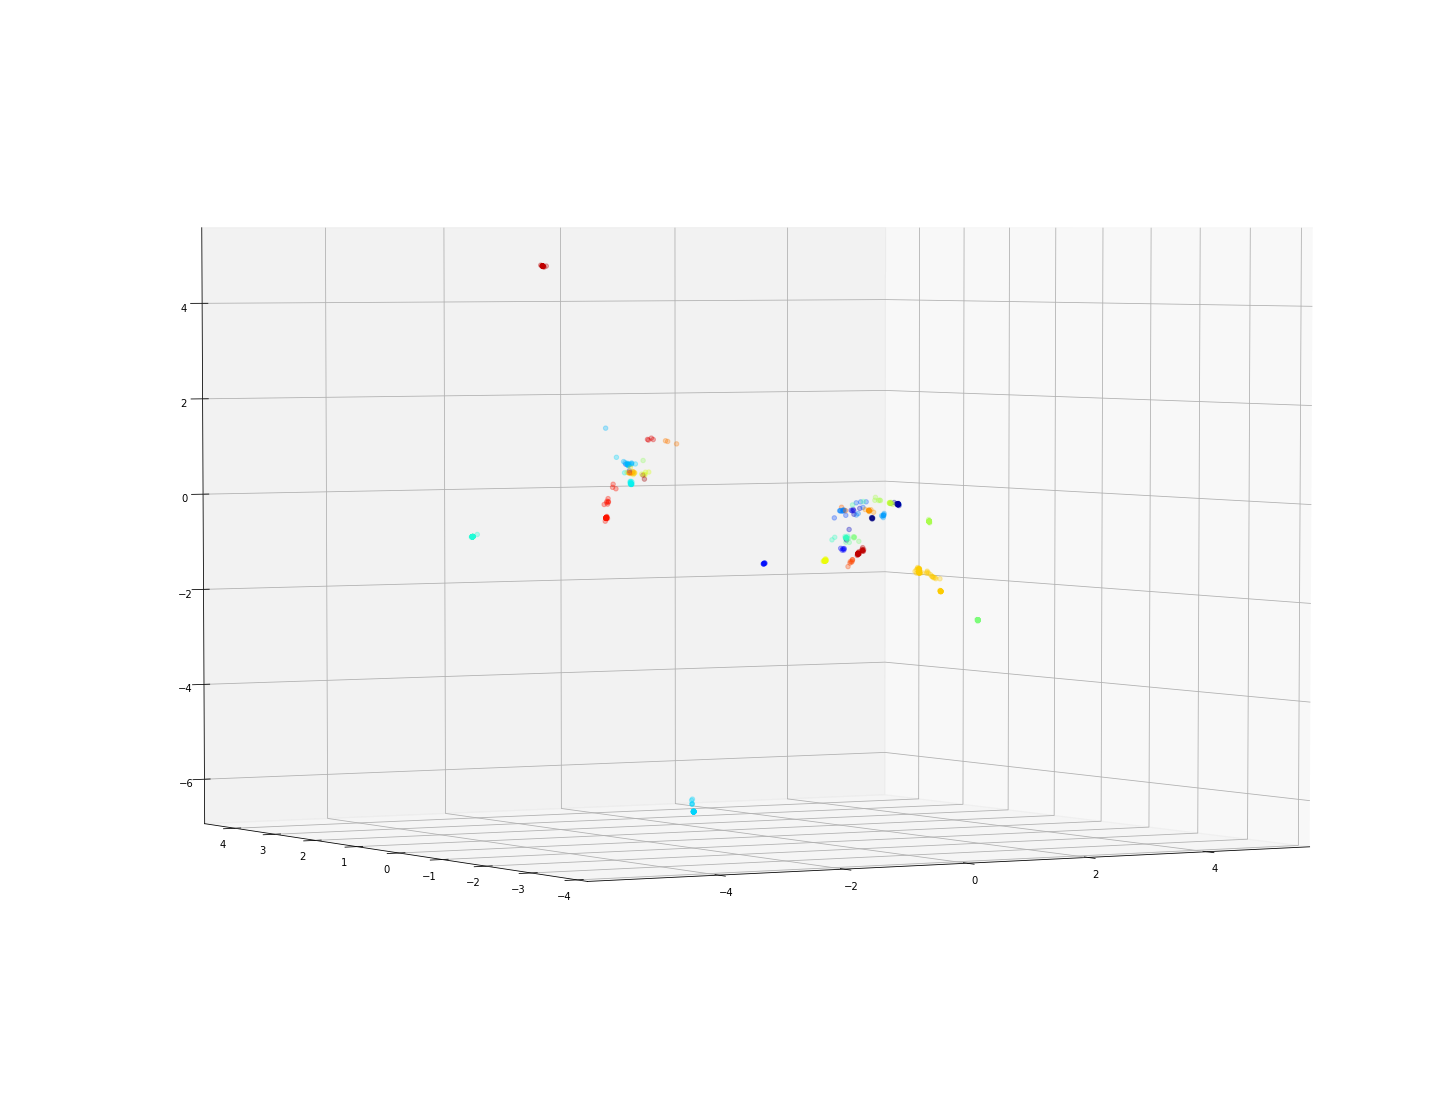

In [5]:
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

fig = plt.figure(figsize=(20, 15))
ax = p3.Axes3D(fig)
ax.view_init(3, -120)
ax.scatter(xyz_filtered[Group_spcm_gteN_idx,0], xyz_filtered[Group_spcm_gteN_idx,1], xyz_filtered[Group_spcm_gteN_idx,2],color=plt.cm.jet(color_map), s=20, alpha=.3)
plt.show()